# Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
# A very useful function to normalize a dictionary of floats
def normalize(d):
    total = 0
    for k in d:
        total += d[k]
    for k in d:
        d[k] /= total

### Find All Possible Characters

In [3]:
import codecs
langs = {"candide.txt":"French", "quijote.txt":"Spanish", "zarathustra.txt":"German", "wonderland.txt":"English"}

chars = []
for b in langs:
    fin = codecs.open("book-markov/" + b, "r", "utf-8")
    for line in fin:
        for c in line.lower().strip():
            if c not in chars and c not in string.punctuation and c not in string.digits and c not in '¡«°»¿':
                chars.append(c)
    fin.close()
    
chars.sort()
chars[0] = u" "
chars.pop()
print("".join(chars))

 abcdefghijklmnopqrstuvwxyzßàáâäçèéêëíîïñóôöùúûü


### Write Code Here!

In [4]:
class MarkovChain:
    
    def __init__(self, filename, chars, language):
        self.language = language
        self.chars = chars
        self.create(filename)
        
    def create(self, filename):
        self.a = {}
        
        #############
        # WRITE CODE HERE
        #############
        
        # Initialize all pathways with a pseduocount of 1
        
        # Record all the transitions in the given file for valid characters
        
        # Normalize the counts to be probabilities for each state
            
    def probability(self, phrase):
        p = 1
        
        #############
        # WRITE CODE HERE
        #############
        
        # Multiply the probabilities for each pair of characters in the given phrase

        return p

In [5]:
models = []
for b in langs:
    models.append(MarkovChain(b, chars, langs[b]))

In [6]:
def language_probs(phrase, models):
    probs = {}
    for m in models:
        probs[m.language] = m.probability(phrase)
    normalize(probs)
    return probs

### A simple test

In [7]:
t = u"Dónde está el baño"
probs = language_probs(t, models)

In [8]:
probs

{'French': 0.25, 'Spanish': 0.25, 'German': 0.25, 'English': 0.25}

### The full test for all phrases

In [9]:
t = [u"Where is the bathroom",
u"Dónde está el baño",
u"Wo ist die Toilette",
u"Où se trouvent les toilettes",
u"Kie estas la necesejo",
u"Kde je toaleta",
u"My hovercraft is full of eels",
u"A légpárnás hajóm tele van angolnákkal",
u"Puno ng palos ang aking hoberkrap",
u"Gari langu linaloangama limejaa na mikunga",
u"Mi aerodeslizador está lleno de anguilas",
u"Mae fy hofrenfad yn llawn llyswennod",
u"Mein Luftkissenfahrzeug ist voller Aale"]

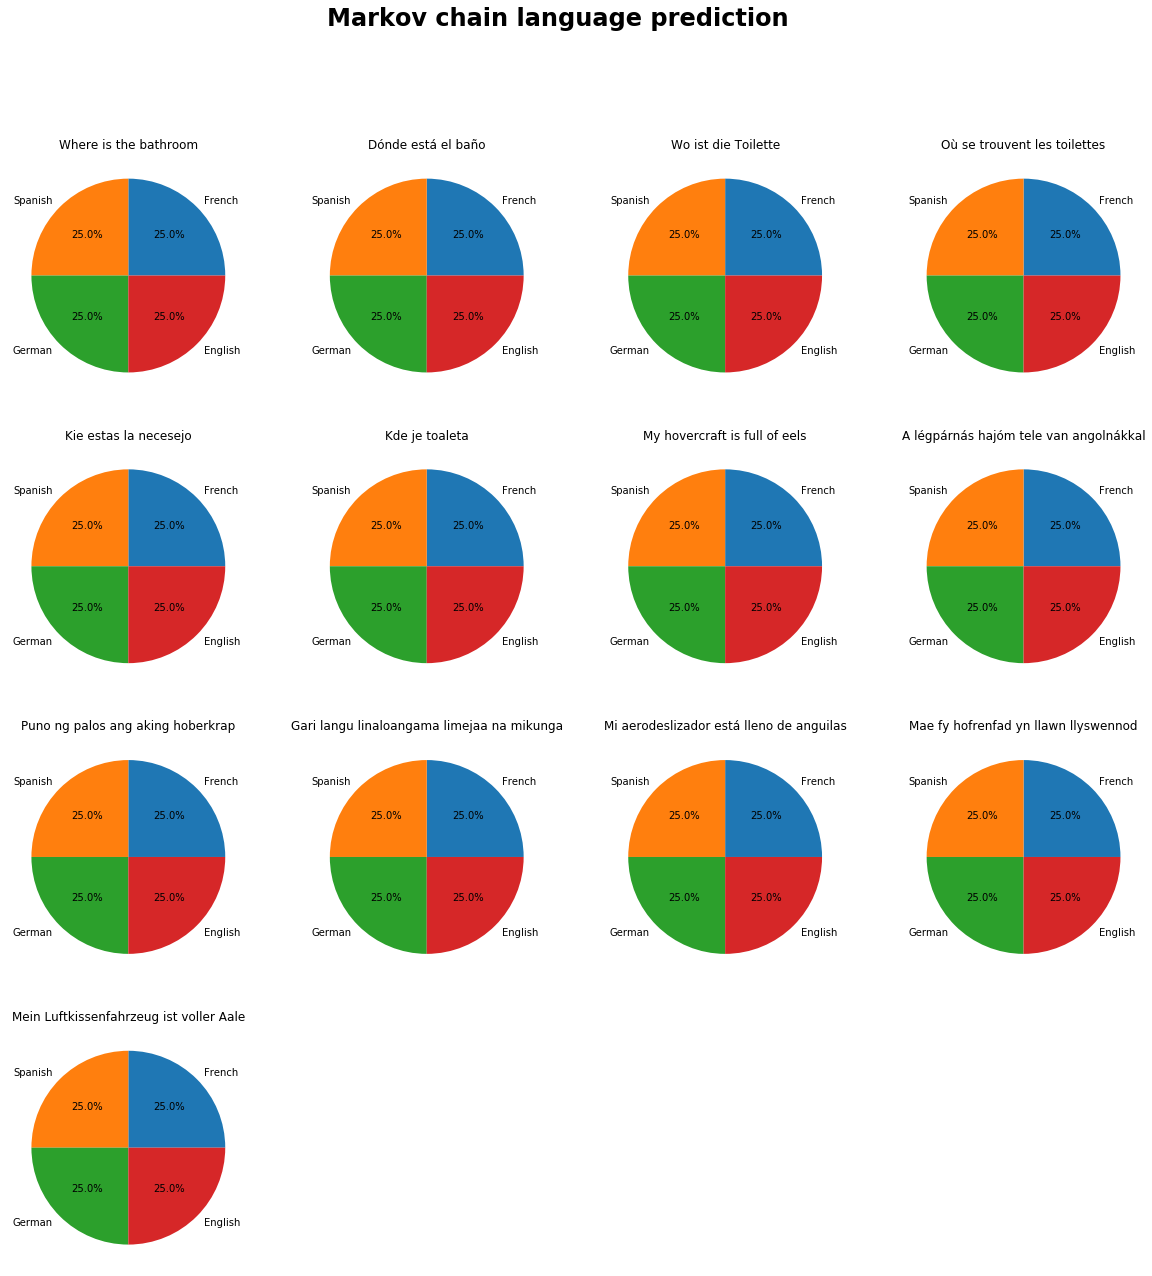

In [10]:
from matplotlib.gridspec import GridSpec
fig = plt.gcf()
plt.suptitle("Markov chain language prediction", fontsize=24, fontweight='bold')
fig.set_size_inches(20.5,20.5)
the_grid = GridSpec(len(t)//4 + 1, 4)
count = 0
for phrase in t:
    probs = language_probs(phrase, models)
    plt.subplot(the_grid[count // 4 , count % 4], aspect=1)
    plt.pie(list(probs.values()), autopct='%1.1f%%', labels=list(probs.keys()))
    plt.title(phrase)
    count += 1
